<a href="https://colab.research.google.com/github/tabraiz-1768/AIML-2025/blob/main/Lab04_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Implement Linear Regression Model Using US Housing Data**

Tabraiz Khan 2303a51768

##Part-1 Implement Linear Regression Model Using US Housing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from google.colab import files

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/USA_Housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
print(df.describe(percentiles=[.25,.5,.75,.9]))

       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
90%        82081.188283             7.243978                   8.274222   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9

In [ ]:
print(df.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


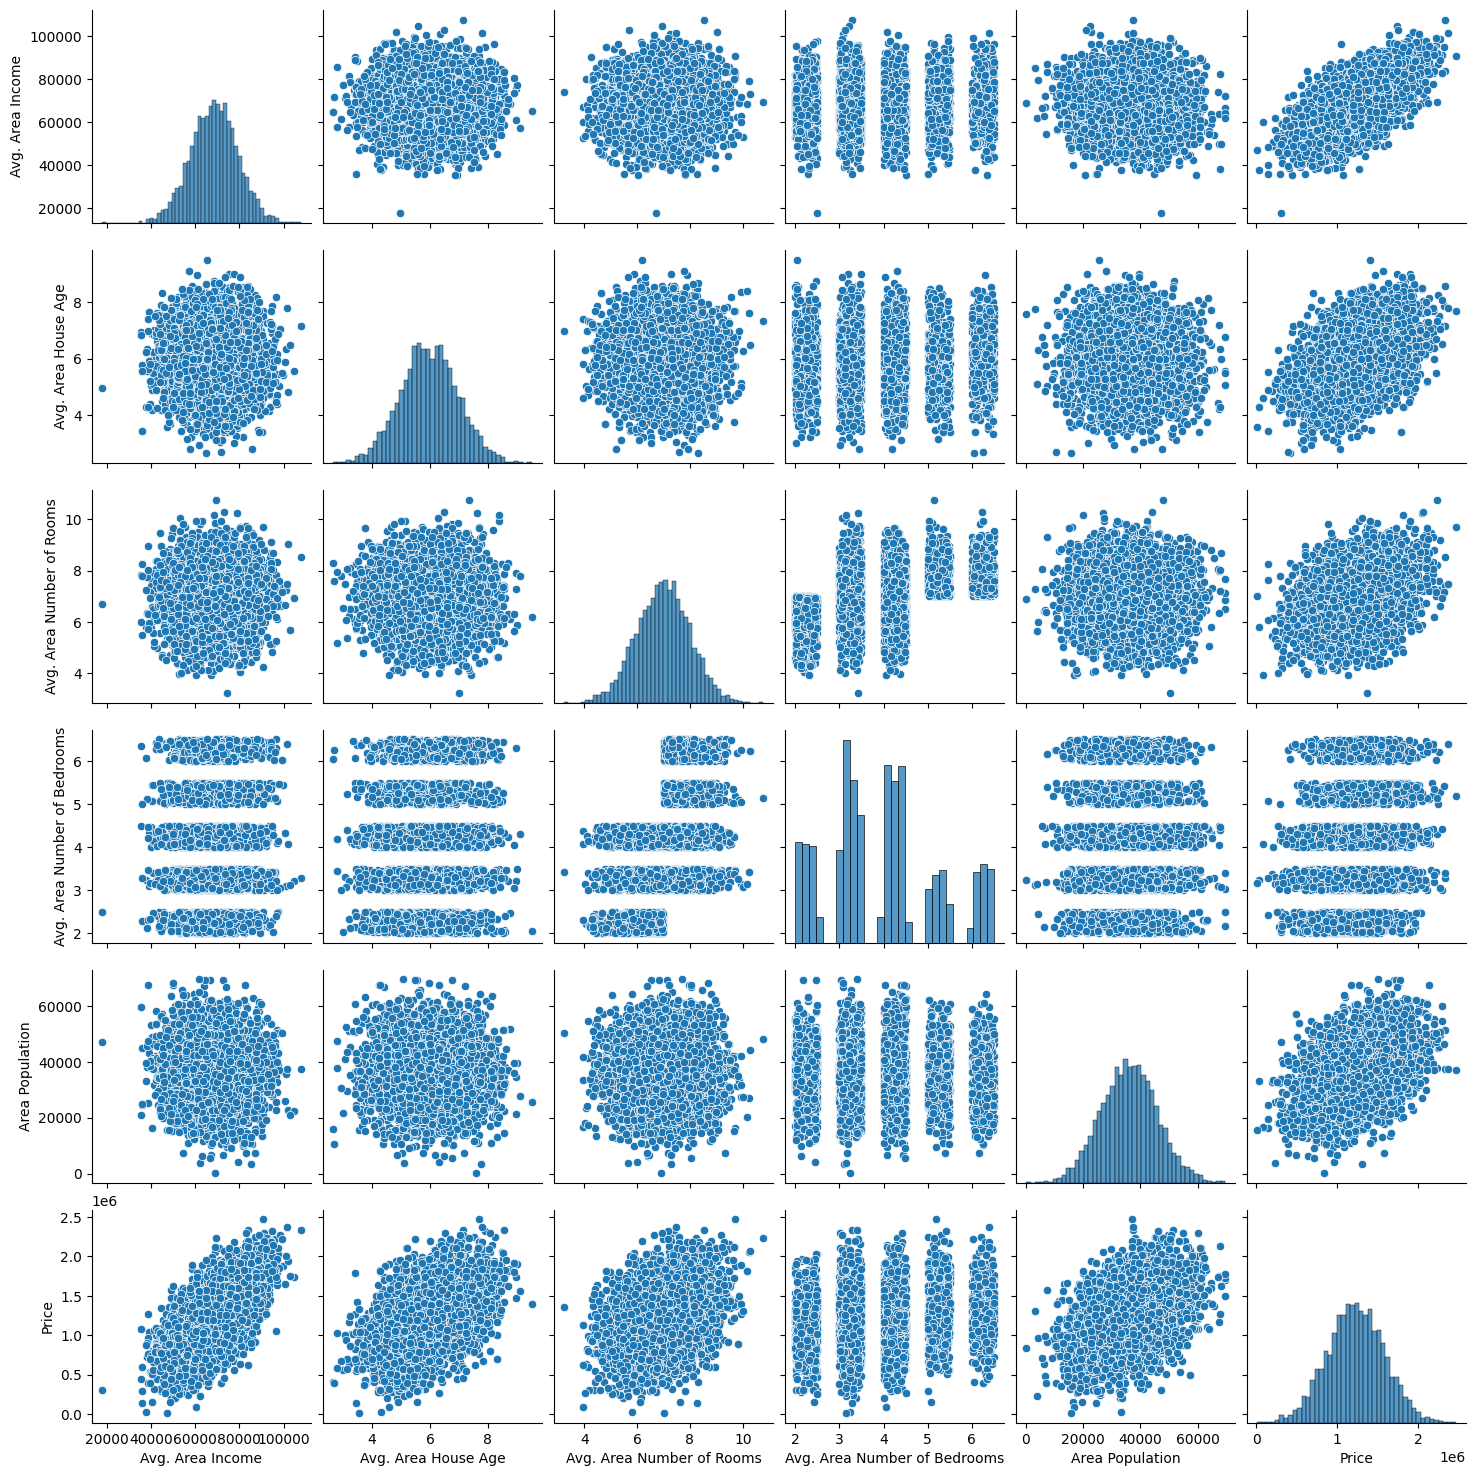

In [ ]:
sns.pairplot(df)
plt.show()

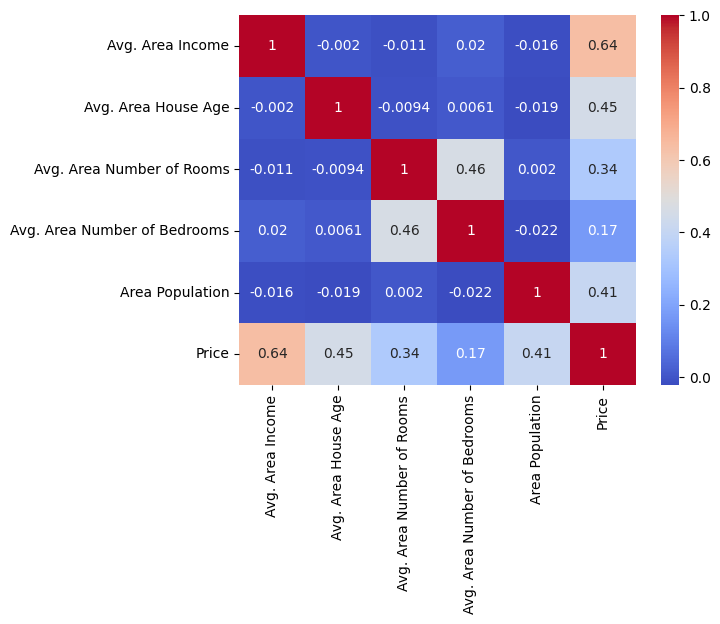

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
Y=df['Price']

##Part-2 Model training and Fit the data to Model

In [ ]:
X = df.drop(columns='Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)
X_train = X_train.drop(columns=non_numeric_cols)
X_test = X_test.drop(columns=non_numeric_cols)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

Non-numeric columns: Index(['Address'], dtype='object')


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -2635072.900933358
Coefficients: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


In [ ]:
intercept = model.intercept_
coefficients = model.coef_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

Intercept: -2635072.900933358
Coefficients: [2.16522058e+01 1.64666481e+05 1.19624012e+05 2.44037761e+03
 1.52703134e+01]


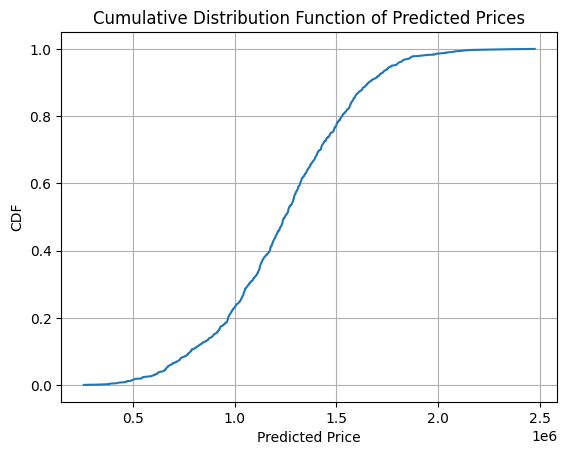

In [ ]:
y_pred = model.predict(X_test)
y_sorted = np.sort(y_pred)
cdf = np.arange(1, len(y_sorted)+1) / len(y_sorted)
plt.plot(y_sorted, cdf)
plt.xlabel('Predicted Price')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Predicted Prices')
plt.grid(True)
plt.show()

##Part-3 Model Evaluation Metrics.

In [ ]:
import numpy as np
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
standard_errors = model_sm.bse
t_statistics = model_sm.tvalues
print("Standard Errors for coefficients:\n", standard_errors)
print("\nT-statistics for coefficients:\n", t_statistics)

Standard Errors for coefficients:
 const                           19196.093303
Avg. Area Income                    0.149834
Avg. Area House Age              1613.612783
Avg. Area Number of Rooms        1794.398252
Avg. Area Number of Bedrooms     1477.302480
Area Population                     0.160827
dtype: float64

T-statistics for coefficients:
 const                          -137.271311
Avg. Area Income                144.508054
Avg. Area House Age             102.048324
Avg. Area Number of Rooms        66.665252
Avg. Area Number of Bedrooms      1.651915
Area Population                  94.948910
dtype: float64


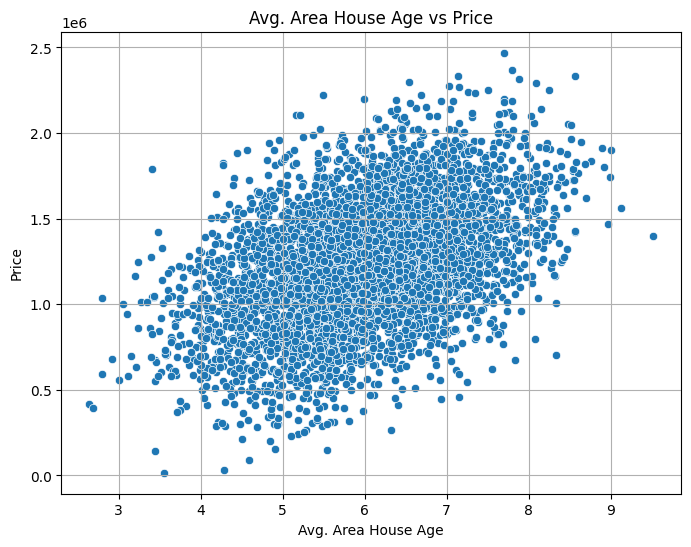

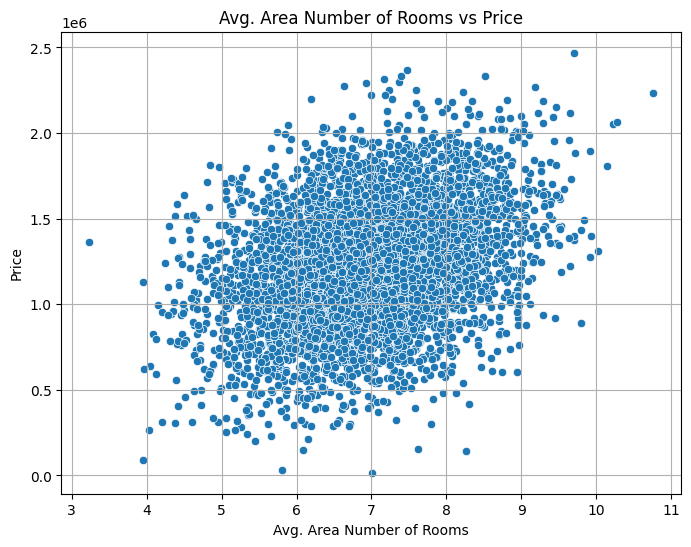

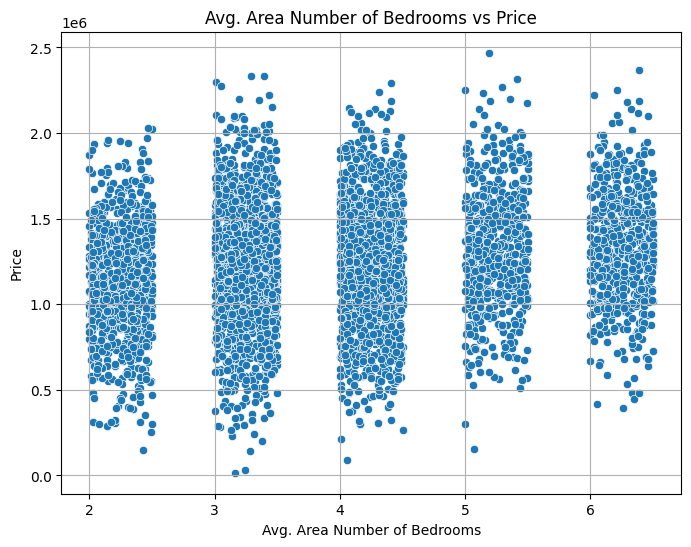

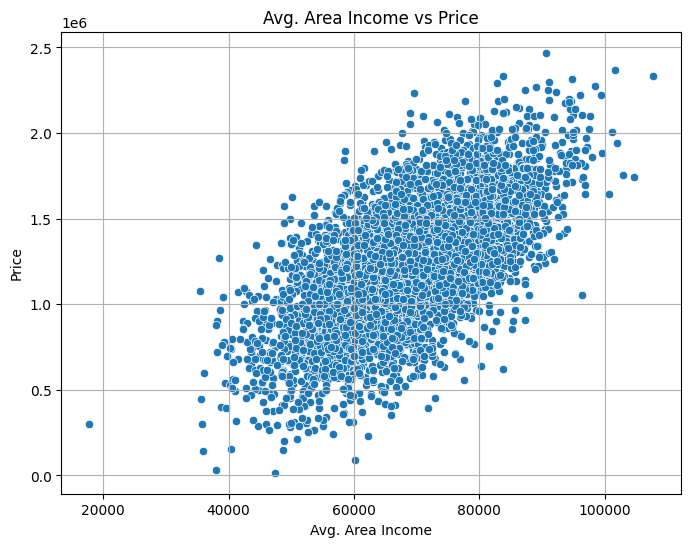

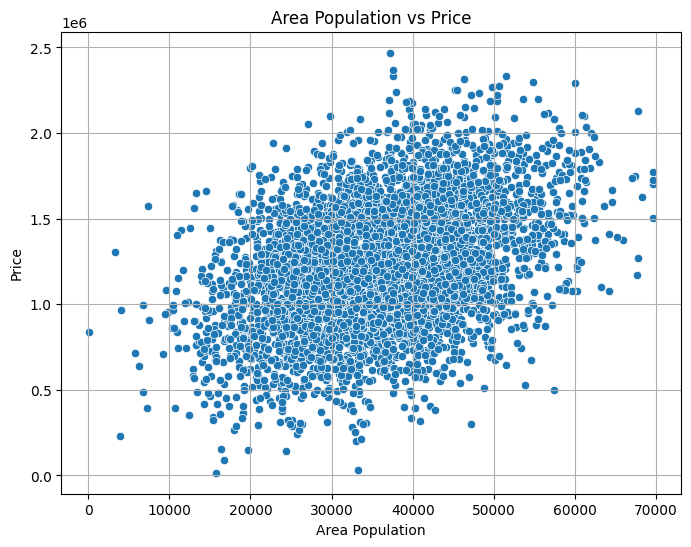

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
coefficients = model_sm.params[1:]
cdf_sorted_coeffs = coefficients.sort_values(ascending=False)
for feature in cdf_sorted_coeffs.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_test_pred = model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9180


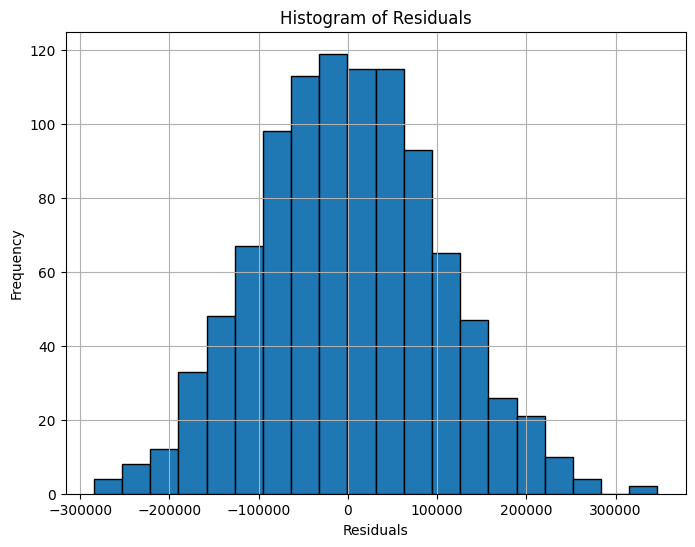

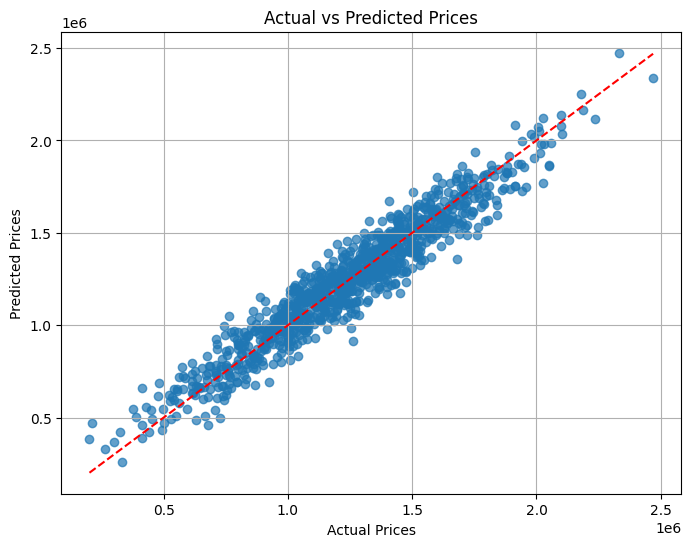

In [ ]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_test_pred)
sse = np.sum((y_test - y_test_pred) ** 2)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Sum of Squared Errors (SSE): {sse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 80879.0972
Sum of Squared Errors (SSE): 10089009300894.5176
Root Mean Squared Error (RMSE): 100444.0606
R² Score: 0.9180


##**Compute the MinMax value between Observed Price and Ex-pected Price for the US Housing Data.**

In [ ]:
def minmax_normalize(series):
    return (series - series.min()) / (series.max() - series.min())
df['Price_minmax'] = minmax_normalize(df['Price'])
print(df[['Price', 'Price_minmax']].head())

          Price  Price_minmax
0  1.059034e+06      0.425210
1  1.505891e+06      0.607369
2  1.058988e+06      0.425192
3  1.260617e+06      0.507384
4  6.309435e+05      0.250702


In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_normalized = df.copy()
df_normalized[numeric_cols] = df_normalized[numeric_cols].apply(minmax_normalize)
print(df_normalized.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          0.686822             0.441986                   0.501502   
1          0.683521             0.488538                   0.464501   
2          0.483737             0.468609                   0.701350   
3          0.506630             0.660956                   0.312430   
4          0.469223             0.348556                   0.611851   

   Avg. Area Number of Bedrooms  Area Population     Price  \
0                      0.464444         0.329942  0.425210   
1                      0.242222         0.575968  0.607369   
2                      0.695556         0.528582  0.425192   
3                      0.280000         0.491549  0.507384   
4                      0.495556         0.376988  0.250702   

                                             Address  Price_minmax  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...      0.425210  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...      0.60

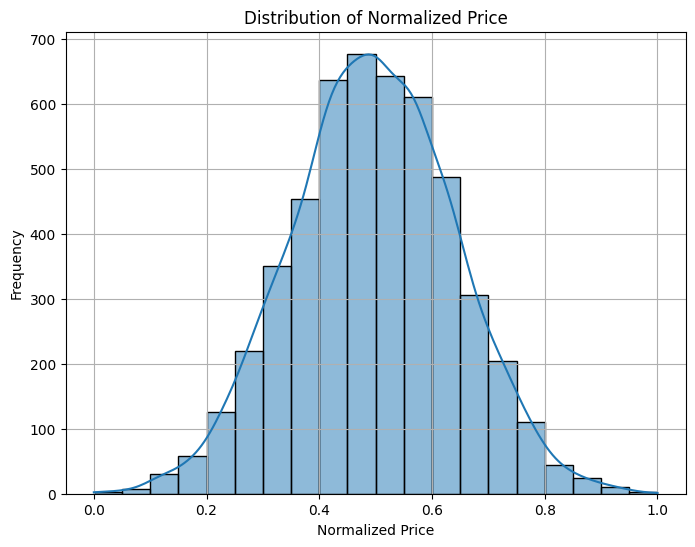

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Price_minmax'], bins=20, kde=True)
plt.title('Distribution of Normalized Price')
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()